#**Servo Prediction using Linear Regression**


**Getting Understanding about Data Set**

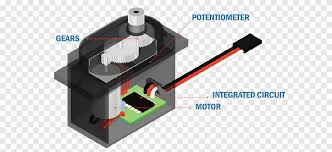

**What is Servo:** A servomechanism (servo) can refer to quite a few different machines that have been around longer than most may realize. Essentially, a servo is any motor-driven system with a feedback element built in. Servos are found everywhere from heavy machinery, to power steering in vehicles, to robotics and a wide variety of electronics.

**Objective**: Servo prediction using linear regression involves using a linear regression model to predict the behavior or position of a servo motor based on input variables. The objective of servo prediction using linear regression is to leverage statistical modeling techniques to accurately predict and control the behavior of servo motors, thereby enhancing the performance and reliability of systems in which they are employed.

This is a data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation
of a servo system involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have
been on of the translational axes of a robot on the AI lab. In any case, the output value is almost certainly a rise time,
the time required for the system to respond to a step change in a position set point. The variables that describe the data
set and their values are the following:
1. Motor A,B,C,D,E
2. Sceew A, B,C,D,E
3. Pgain 3,4,5,6
4. Vgain 1,2,3,4,5
5. Class 0.13 to 7.10








**Data Source**: https://github.com/YBIFoundation/Dataset/blob/main/Servo%20Mechanism.csv

In [13]:
# Step 1: import library
import pandas as pd

In [14]:
import numpy as np

In [15]:
# Step 2: import data
df = pd.read_csv(r'https://github.com/YBIFoundation/Dataset/raw/main/Servo%20Mechanism.csv')


# Get the first five Rows of Dataframe

In [16]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# Get Information of DataFrame

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


# Summary Statistics: (Describe Data)

In [18]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


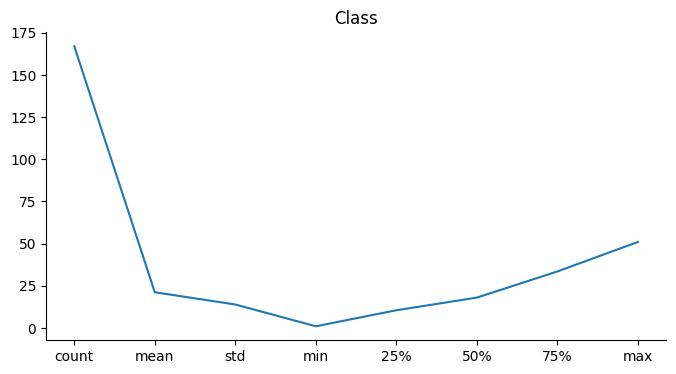

In [19]:
from matplotlib import pyplot as plt
_df_7['Class'].plot(kind='line', figsize=(8, 4), title='Class')
plt.gca().spines[['top', 'right']].set_visible(False)

# Data Visualization

In [20]:
# Get Column Names
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [21]:
# Get Shape of DataFrame
df.shape

(167, 5)

In [22]:
# Get Categories and Counts of Categorical Variables
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [23]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [24]:
# Get Encoding of Categorical Features
df.replace({'Motor':{'A':0, 'B':1, 'C':2, 'D': 3, 'E': 4}}, inplace=True)
df.replace({'Screw':{'A':0, 'B':1, 'C':2, 'D': 3, 'E': 4}}, inplace=True)


# Define Target Variable (y) and Feature Variables (X)

In [25]:
y = df['Class']
y.shape

(167,)

In [26]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [27]:
X = df[['Motor', 'Screw', 'Pgain', 'Vgain']]
X.shape

(167, 4)

In [28]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# Train Test Split

In [29]:
# Step 4 : train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=2529)

In [43]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50, 4), (117, 4), (50,), (117,))

# Modeling

In [44]:
# Step 5: Select Model (Choose the model u want to use to solve the problem, NB: It doesn't have to be Linear Regression, it could be Geometry, Entropy...)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [45]:
#Step 6: Train the model(fit model) NB: This is the step where machine learning happens, also .fit is the function here...
lr.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [46]:
lr.intercept_

77.90491786252491

In [47]:
lr.coef_

array([ -1.67743858,  -2.63837066, -16.18303123,   6.39878192])

# Prediction

In [52]:
y_pred = lr.predict(X_test)
y_pred

array([ 24.89015109,  28.08391972,  17.55257369,  19.57157488,
        37.1210723 ,  23.02101376,  11.31490029,  17.33873833,
        38.79851087,  39.51501737,  12.99233887,  22.61547965,
        15.87513511,  11.6564629 ,  19.26060249,  16.93320422,
        -4.46259683,  29.92246682,  31.59990539,  -3.35180088,
        30.72229038,  30.8833989 ,  32.80526306,  27.12298763,
        14.53925915,   6.09088581,  27.33682299,  14.70036767,
        21.65454756,   3.45251515,  29.01426157,  22.77658817,
        34.23827605,  28.80042621,   8.30158575,   3.20808956,
        17.8941363 ,  29.76135829,  12.61739498,  36.16014022,
        27.52852175,  19.01617691,   7.34065367,   5.66321509,
        30.1668924 ,  28.24502824,  32.56083747,   4.16902164,
        20.69361548,  18.05524482,  24.45402675,   7.58507925,
        22.58488942,  33.11623545,  15.25576564,   0.5697189 ,
        36.87664671,   0.81414449,  16.21669772,  -1.82422617,
        22.06008168,  30.47786479,  23.52368489,  24.48

In [37]:
X_test

,Motor,Screw,Pgain,Vgain
35,4,4,3,2
107,3,1,3,1
127,3,0,5,4
115,0,0,4,1
160,3,0,3,2
...,...,...,...,...
14,2,2,5,4
29,1,1,3,2
86,4,4,4,3
62,4,1,5,4


In [54]:
# Get Model Evaluation
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [39]:
#y_test

In [40]:
mean_absolute_error(y_test,y_pred)

7.158141394974153

In [56]:
r2_score(y_test,y_pred)

0.6372902527668625

In [55]:
mean_squared_error(y_test,y_pred)

73.57022323365531

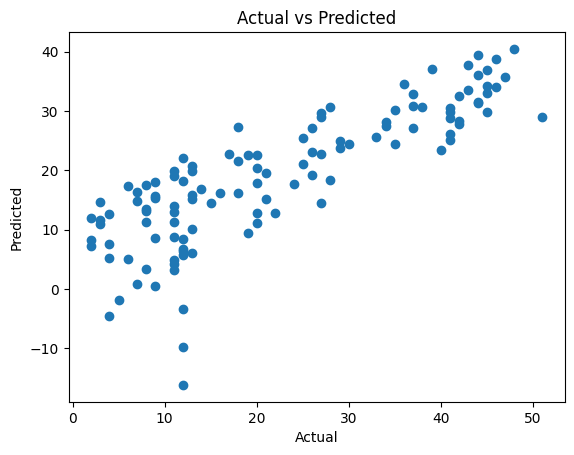

In [58]:
# # Get Visualization of Actual Vs Predicted Results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# **Get Future Predictions**

## **Lets select a random sample from exisitng dataset as new value**
Steps to follow
	1. Extract a random now using sample function
	2. Seperate X and y
	3. Standardize X
	4. Predict

In [59]:
X_new = df.sample(1)
X_new

,Motor,Screw,Pgain,Vgain,Class
117,4,3,6,5,5


In [60]:
X_new.shape

(1, 5)

In [61]:
X_new = X_new.drop('Class', axis = 1)

In [62]:
X_new

,Motor,Screw,Pgain,Vgain
117,4,3,6,5


In [63]:
X_new.shape

(1, 4)

# **Prediction and Explanation:**
1. Data Preparation:

We split the dataset into training and testing sets.
We preprocess the data (scaling, handling missing values, etc.), if necessary.

2. Model Training:

We fit the linear regression model to the training data.
The model estimates the coefficients and that minimize the prediction error.

3. Model Evaluation:

We evaluate the model's performance using metrics like mean squared error (MSE) or R-squared on the testing data.
The evaluation tells us how well the model generalizes to new, unseen data.

4. Prediction:

Once the model is trained and evaluated, we can use it to predict the position of the robotic arm for new combinations of voltage and temperature.
For example, if we apply 6 volts and the temperature is 25°C, the model predicts the corresponding position of the robotic arm.

5. Explanation:

- The model's coefficients provide insights into the relationship between the input variables (voltage, temperature) and the output variable (robotic arm position).
- Positive or negative coefficients indicate the direction and magnitude of the influence of each input variable on the output.
For instance, if the coefficient for voltage is positive, it means that increasing voltage tends to increase the position of the robotic arm.

### Conclusion:
In summary, servo prediction using linear regression involves training a model to predict servo motor behavior based on input variables and using the model to make predictions for new data. The explanation of the model provides insights into the relationship between the input variables and the servo motor's behavior.